In [29]:
import numpy as np

import astropy.units as u
from astropy import time

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.util import time_range
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

from poliastro.util import norm

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver

In [30]:
print(Earth)

Earth (♁)


In [43]:
from astroquery.jplhorizons import Horizons
obj = Horizons(id=499, location="@sun", epochs=Time("2022-08-12").jd, id_type='id').vectors()

In [44]:
print(Horizons)
obj['targetname',"x",'y','z', 'vx','vy','vz']

JPLHorizons instance "None"; location=None, epochs=None, id_type=smallbody


targetname,x,y,z,vx,vy,vz
---,AU,AU,AU,AU / d,AU / d,AU / d
str10,float64,float64,float64,float64,float64,float64
Mars (499),1.383883890612505,0.2091891785143125,-0.02956193163946066,-0.001555736547542775,0.0150338029097121,0.0003532433651706942


In [12]:
from poliastro.plotting import OrbitPlotter3D
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)



date_launch = time.Time("2022-09-01 15:02", scale="utc").tdb
date_arrival = time.Time("2023-04-25 05:17", scale="utc").tdb
ss_earth = Orbit.from_ephem(Sun, Earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, Mars, date_arrival)
man_lambert = Maneuver.lambert(ss_earth, ss_mars)


plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth, date_launch, label="Earth at launch position")
plotter.plot_ephem(mars, date_arrival, label="Mars at arrival position")
plotter.plot_trajectory(
    ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Transfer orbit"
)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

AttributeError: 'SolarSystemPlanet' object has no attribute 'rv'

In [14]:

from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")
# Initial data
date_launch = time.Time("2022-09-01 15:02", scale="utc").tdb
date_arrival = time.Time("2012-04-022 05:17", scale="utc").tdb
earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))
# Solve for departure and target orbits
ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)



# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)
from poliastro.plotting import OrbitPlotter3D
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth, date_launch, label="Earth at launch position")
plotter.plot_ephem(mars, date_arrival, label="Mars at arrival position")
plotter.plot_trajectory(
    ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Transfer orbit"
)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

ValueError: Input values did not match any of the formats where the format keyword is optional: {'datetime': TypeError('Input values for datetime class must be datetime objects'), 'ymdhms': ValueError('input must be dict or table-like'), 'iso': ValueError('Time 2012-04-022 05:17 does not match iso format'), 'isot': ValueError('Time 2012-04-022 05:17 does not match isot format'), 'yday': ValueError('Time 2012-04-022 05:17 does not match yday format'), 'datetime64': TypeError('Input values for datetime64 class must be datetime64 objects'), 'fits': ValueError('Time 2012-04-022 05:17 does not match fits format'), 'byear_str': ValueError('Time 2012-04-022 05:17 does not match byear_str format'), 'jyear_str': ValueError('Time 2012-04-022 05:17 does not match jyear_str format'), 'astropy_time': TypeError('Input values for astropy_time class must all be same astropy Time type.')}

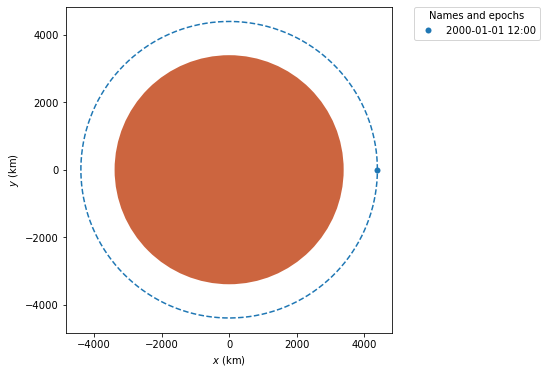

In [15]:
a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg

#orb = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)
orb=Orbit.circular(Mars, alt=1000 * u.km)
orb.plot()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

from poliastro.util import norm

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver


n=100
start_alt=np.zeros(n)
boost1=np.zeros(n)
boost2=np.zeros(n)

for i in range(0,n):
    start_alt[i]=n*100
    ss_i = Orbit.circular(Earth, alt=start_alt[i] * u.km)
    r_f=Orbit.circular(Mars, alt=start_alt[i]*u.km)
    r_i = ss_i.a.to(u.km)
    v_i_vec = ss_i.v.to(u.km / u.s)
    starting_velocity=v_i = norm(v_i_vec)
    
    man = Maneuver.hohmann(ss_i, r_f)
    (_, dv_a), (_, dv_b) = man.impulses
    boost1[i] = norm(dv_a)
    boost2[i] = norm(dv_b)
    
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot((start_alt).value, (boost1).value, label="First impulse")
ax.plot((start_alt).value, (booost2).value, label="Second impulse")
ax.plot((start_alt).value, ((boost1+boost2) / v_i).value, label="Total cost")

ax.plot((r_f_vector / r_i).value, np.full(N, np.sqrt(2) - 1), 'k--')
ax.plot((r_f_vector / r_i).value, (1 / np.sqrt(r_f_vector / r_i)).value, 'k--')

ax.set_ylim(0, 0.7)
ax.set_xlabel("$R$")
ax.set_ylabel("$\Delta v_a / v_i$")

plt.legend()

TypeError: Unsupported operand type(s) for ufunc add: 'Quantity,Orbit'

1 x 1 AU x 0.0 deg (HCRS) orbit around Sun (☉) at epoch J2000.000 (TT)


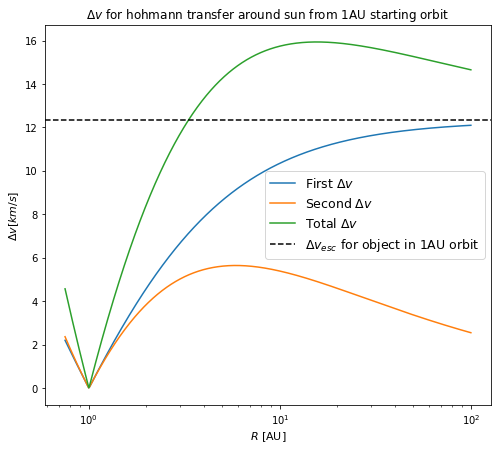

In [7]:
from poliastro.bodies import Sun
from matplotlib.lines import Line2D
ss_i = Orbit.circular(Sun, alt=1.496e+8 * u.km)
print(ss_i)
r_i = ss_i.a.to(u.km)
v_i_vec = ss_i.v.to(u.km / u.s)
v_i = norm(v_i_vec)
N = 10000
dv_a_vector = np.zeros(N) * u.km / u.s
dv_b_vector = dv_a_vector.copy()
r_f_vector = r_i * np.linspace(0.75, 100, num=N)
for ii, r_f in enumerate(r_f_vector):
    man = Maneuver.hohmann(ss_i, r_f)
    (_, dv_a), (_, dv_b) = man.impulses
    dv_a_vector[ii] = norm(dv_a)
    dv_b_vector[ii] = norm(dv_b)

fig, ax = plt.subplots(figsize=(8, 7))

ax.semilogx((r_f_vector/r_i ).value, (dv_a_vector ).value, label="First $\Delta v$")
ax.semilogx((r_f_vector/r_i ).value, (dv_b_vector ).value, label="Second $\Delta v$")
ax.semilogx((r_f_vector/r_i ).value, ((dv_a_vector + dv_b_vector)).value, label="Total $\Delta v$")
plt.axhline(y=12.33, color='black', linestyle='dashed', label='$\Delta v_{esc}$ for object in 1AU orbit')
ax.set_xlabel("$R$ [AU]", fontsize=11)
ax.set_ylabel("$\Delta v [km/s]$",fontsize=11)

plt.title('$\Delta v$ for hohmann transfer around sun from 1AU starting orbit', fontsize=12)
plt.legend(prop={'size': 12.5})


In [9]:
man=man.hohmann(ss_earth, 1000000000)
print(man.impulses)

NameError: name 'ss_earth' is not defined

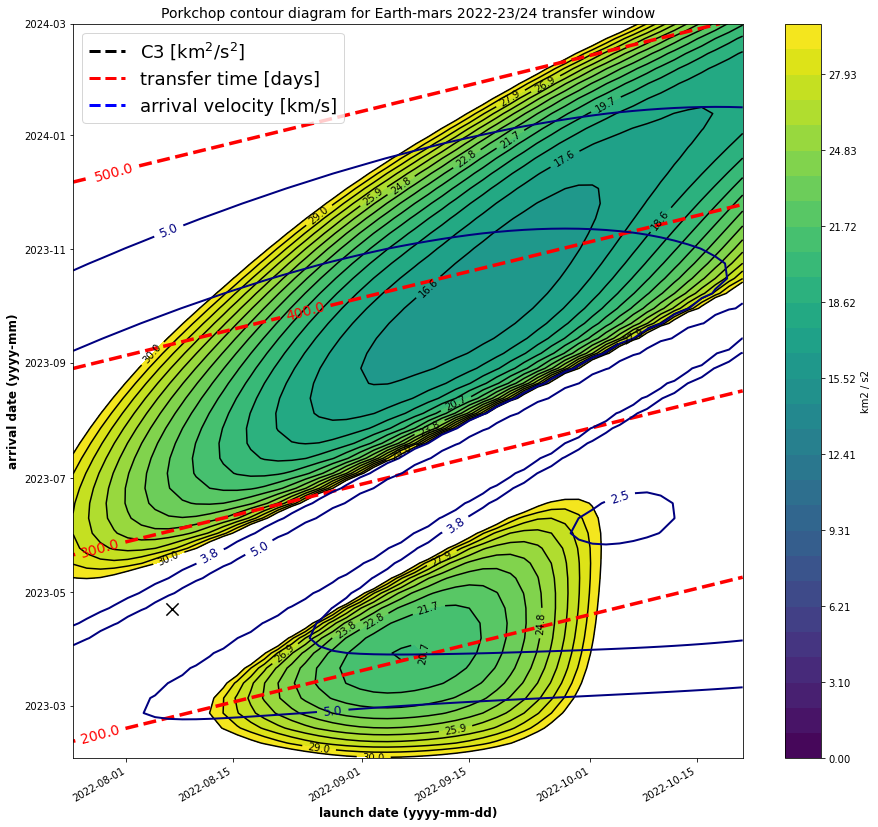

In [5]:
import astropy.units as u
import pandas as pd
from poliastro.plotting.porkchop import porkchop
from poliastro.bodies import Earth, Mars
from poliastro.util import time_range
from matplotlib.lines import Line2D

launch_span = time_range("2022-07-25", end="2022-10-21")
arrival_span = time_range("2023-02-01", end="2024-03-01")
#dv_dpt, dv_arr, c3dpt, c3arr, tof = porkchop(Earth, Mars,launch_span, arrival_span)
tof= porkchop(Earth, Mars,launch_span, arrival_span, tfl=True, vhp=True, max_c3=30 * u.km**2 / u.s**2)   
plt.title("Porkchop contour diagram for Earth-mars 2022-23/24 transfer window", fontsize=14)
d=['2022-08-07']
e=['2023-04-22']
d=pd.to_datetime(d)
e=pd.to_datetime(e)
plt.scatter(d,e, label='hohmann transfer',marker='x', color='black', s=150)
plt.xlabel("launch date (yyyy-mm-dd)", fontsize=12)
plt.ylabel("arrival date (yyyy-mm)", fontsize=12)




plt.grid(False)
colors = ['black', 'red', 'blue']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['C3 [km$^2$/s$^2$]', 'transfer time [days]', 'arrival velocity [km/s]']
#.annotate('Hohmann transfer', xy=(d, e),  xycoords=(0.1,0.1), textcoords='axes fraction',arrowprops=dict(facecolor='grey', shrink=0.05),horizontalalignment='right', verticalalignment='top')
plt.legend(lines, labels,loc="upper left",prop={'size': 18})

In [1]:
import numpy as np
# Temporary hack, see https://github.com/poliastro/poliastro/issues/281
from IPython.display import HTML
HTML('<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>')
from poliastro.examples import *
from poliastro.plotting import *

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)


frame = OrbitPlotter3D()

date_launch = time.Time('2022-09-08 15:02', scale='utc')
date_arrival = time.Time('2023-04-22 05:17', scale='utc')

rr_earth, _ = get_body_barycentric_posvel("earth", time_range(date_launch, end=date_arrival, periods=50))
rr_mars, _ = get_body_barycentric_posvel("mars", time_range(date_launch, end=date_arrival, periods=50))
frame.set_attractor(Sun)
frame.plot(churi)
frame.plot(Orbit.from_body_ephem(Earth))
frame.plot(Orbit.from_body_ephem(Mars))

frame.plot_trajectory(rr_earth, label=Earth)
frame.plot_trajectory(rr_mars, label=Mars)
frame.show()

NameError: name 'get_body_barycentric_posvel' is not defined

In [7]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")
# Initial data
date_launch = time.Time("2011-11-26 15:02", scale="utc").tdb
date_arrival = time.Time("2012-08-06 05:17", scale="utc").tdb
earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))
ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)
from poliastro.plotting import OrbitPlotter3D
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth, date_arrival, label="Earth ")
plotter.plot_ephem(mars, date_arrival, label="Mars ")
plotter.plot_trajectory(
    ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Rocket trajectory"
)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

In [20]:
from astropy.time import Time

from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import *
from poliastro.twobody import Orbit

EPOCH = Time("2022-08-07 12:00:00", scale="tdb")
frame = OrbitPlotter3D()

frame.plot(Orbit.from_body_ephem(Earth, EPOCH), label=Earth)
frame.plot(Orbit.from_body_ephem(Mars, EPOCH), label=Mars)


#plotter.plot_trajectory(ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Transfer orbit")

<ipython-input-20-504830ae7b5b>:12: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead

<ipython-input-20-504830ae7b5b>:13: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead



In [11]:
print(Orbit.from_body_ephem(Earth, EPOCH))
print(Orbit.from_body_ephem(Mars, EPOCH))

1 x 1 AU x 23.4 deg (ICRS) orbit around Sun (☉) at epoch 2022-08-07 12:00:00.000 (TDB)
1 x 2 AU x 24.7 deg (ICRS) orbit around Sun (☉) at epoch 2022-08-07 12:00:00.000 (TDB)


<ipython-input-11-c62e624a67a2>:1: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead

<ipython-input-11-c62e624a67a2>:2: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead



In [15]:
import ephem
m = ephem.Mars()
m.compute('2022/09/07')
print('%s %s' % (m.sun_distance, m.earth_distance))
print(mars.ra)

1.4218815565109253 0.9240802526473999
5:59:27.35


In [3]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")
# Initial data
date_launch = time.Time("2022-07-12 15:02", scale="utc").tdb
date_arrival = time.Time("2023-03-27 05:17", scale="utc").tdb
date_arrival2 = time.Time("2023-07-12 15:02", scale="utc").tdb
earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))
ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)
from poliastro.plotting import OrbitPlotter3D
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth, date_launch, label="Earth at launch position")
plotter.plot_ephem(mars, date_arrival, label="Mars at arrival position")
plotter.plot_trajectory(
    ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Transfer orbit"
)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

In [17]:

frame = OrbitPlotter3D()

frame.plot(mars, label="Mars")
frame.plot_trajectory(earth.sample(), label=Earth)


AttributeError: 'Ephem' object has no attribute 'attractor'

In [15]:
date_launch = time.Time("2022-07-12 00:00", scale="utc").tdb
date_arrival = time.Time("2022-07-12 00:00", scale="utc").tdb

earth = Ephem.from_body(
    Earth, time_range(date_launch, end=date_arrival, periods=50)
)
frame = OrbitPlotter3D()
frame.set_attractor(Sun)

frame.plot_body_orbit(Earth,date_launch, label=Earth)
frame.plot_body_orbit(Mars, date_arrival, label=Mars)
#frame.plot_ephem(earth, label=Earth)

In [46]:
print('hello olive')

hello olive


In [50]:
def hello(name):
    print(name)
    

In [51]:
hello(olive)

NameError: name 'olive' is not defined